In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

### Importing Dataset for Text Classification

In [211]:
df_new = pd.read_csv("Vodaphone_review_dataset.csv")

df_new.head()

,Rating,Review,Name,Location,Date,Clean_Review,Sentiment,Sentiment Label,Churn_Keyword,Churn,Review_Date,Review_Time,Weekday,Month,Review_Length,Word_Count
0,1,"Trying to buy broadband through Uswitch, then ...",Alfie Calas,GB,2025-06-05 22:03:24+00:00,trying to buy broadband through uswitch then h...,-0.020000,neutral,1,1,2025-06-05,22:03:24,Thursday,June,280,48
1,5,Sona did a great job either my trade in and co...,Julliette,GB,2025-06-05 21:51:17+00:00,sona did a great job either my trade in and co...,0.700000,positive,0,0,2025-06-05,21:51:17,Thursday,June,68,13
2,1,"One of the worst , if not the worst when it co...",Vlad Ureche,GB,2025-06-05 21:28:36+00:00,one of the worst if not the worst when it come...,-0.200000,neutral,0,1,2025-06-05,21:28:36,Thursday,June,154,34
3,1,How those people get 4.6 rate that’s a joke my...,Adam Farbotko,GB,2025-06-05 21:14:08+00:00,how those people get rate thats a joke my full...,0.275000,positive,0,1,2025-06-05,21:14:08,Thursday,June,240,44
4,1,Held to ransom by a ‘reputable’ company. Purch...,Chloe,GB,2025-06-05 20:24:59+00:00,held to ransom by a reputable company purchase...,-0.003634,neutral,1,1,2025-06-05,20:24:59,Thursday,June,1620,320


In [212]:
df_new = df_new[df_new['Clean_Review'].notna()]

In [213]:
df_new.Clean_Review.isnull().sum()

np.int64(0)

In [214]:
df_new.columns

Index(['Rating', 'Review', 'Name', 'Location', 'Date', 'Clean_Review',
       'Sentiment', 'Sentiment Label', 'Churn_Keyword', 'Churn', 'Review_Date',
       'Review_Time', 'Weekday', 'Month', 'Review_Length', 'Word_Count'],
      dtype='object')

In [215]:
df_new = df_new.drop(columns=['Sentiment', 'Sentiment Label', 'Churn_Keyword', 'Review',  'Review_Length', 'Word_Count'])

df_new.head()

,Rating,Name,Location,Date,Clean_Review,Churn,Review_Date,Review_Time,Weekday,Month
0,1,Alfie Calas,GB,2025-06-05 22:03:24+00:00,trying to buy broadband through uswitch then h...,1,2025-06-05,22:03:24,Thursday,June
1,5,Julliette,GB,2025-06-05 21:51:17+00:00,sona did a great job either my trade in and co...,0,2025-06-05,21:51:17,Thursday,June
2,1,Vlad Ureche,GB,2025-06-05 21:28:36+00:00,one of the worst if not the worst when it come...,1,2025-06-05,21:28:36,Thursday,June
3,1,Adam Farbotko,GB,2025-06-05 21:14:08+00:00,how those people get rate thats a joke my full...,1,2025-06-05,21:14:08,Thursday,June
4,1,Chloe,GB,2025-06-05 20:24:59+00:00,held to ransom by a reputable company purchase...,1,2025-06-05,20:24:59,Thursday,June


In [216]:
df_new.columns

Index(['Rating', 'Name', 'Location', 'Date', 'Clean_Review', 'Churn',
       'Review_Date', 'Review_Time', 'Weekday', 'Month'],
      dtype='object')

In [217]:
df_new.isna().sum()

Rating          0
Name            2
Location        0
Date            0
Clean_Review    0
Churn           0
Review_Date     0
Review_Time     0
Weekday         0
Month           0
dtype: int64

## Word Cloud from Reviews

### 1. World Cloud for All Reviews

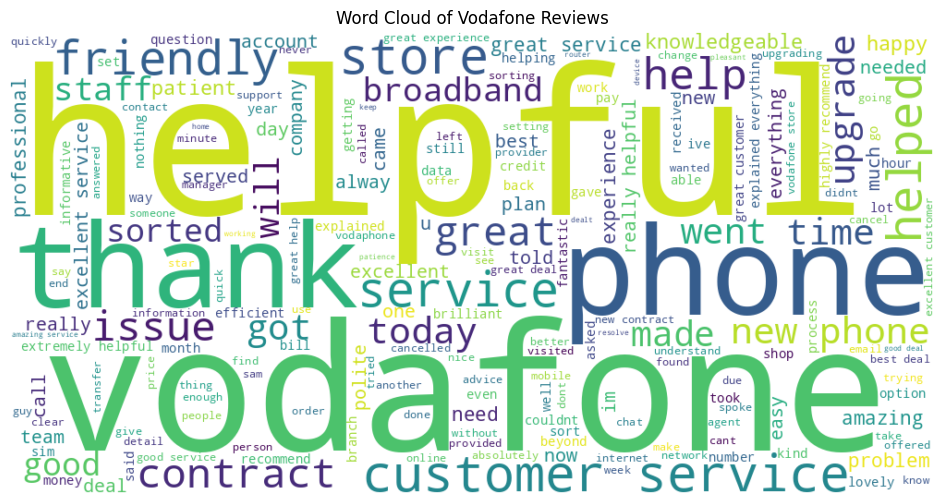

In [218]:
# Combining all text reviews into one string
all_reviews = " ".join(df_new['Clean_Review'].dropna())

# Generating the word cloud
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Vodafone Reviews')
plt.show()

### 2. World Cloud for Churn Reviews 

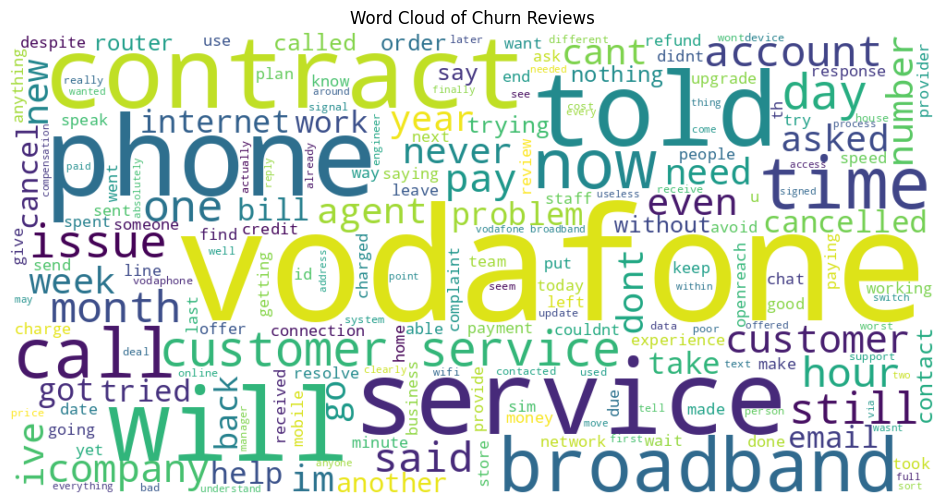

In [219]:
churn_reviews = " ".join(df_new[df_new['Churn'] == 1]['Clean_Review'].dropna())

wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(churn_reviews)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Churn Reviews')
plt.show()


### TF-IDF Classification

In [220]:
# Importing necessary libraries for text classification

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [221]:
# Creating feature matrix and target vector

X = df_new['Clean_Review']
y = df_new['Churn']

In [222]:
# Splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [223]:
X.isna().sum()

np.int64(0)

In [224]:
# Vectorizing the text data using TF-IDF

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [225]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)


LogisticRegression()

In [226]:
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1728
           1       0.99      0.74      0.85       153

    accuracy                           0.98      1881
   macro avg       0.98      0.87      0.92      1881
weighted avg       0.98      0.98      0.98      1881



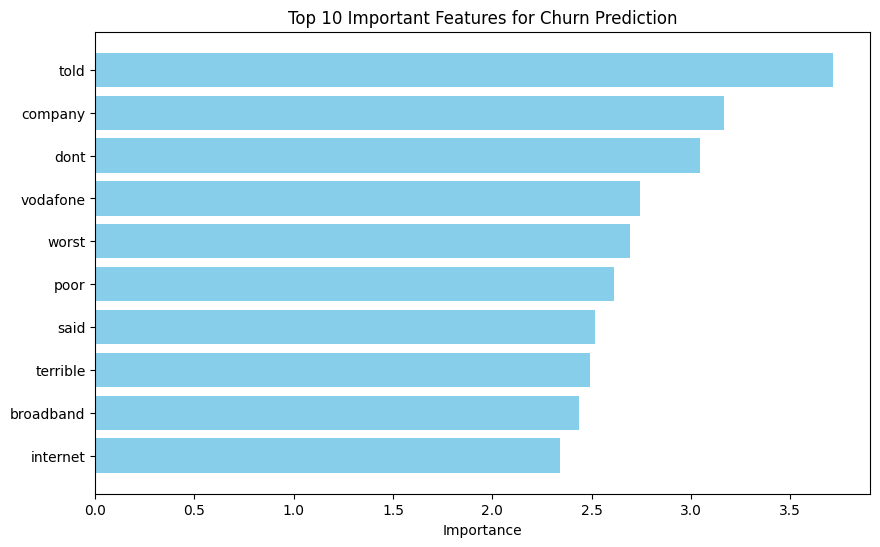

In [227]:
#Feature importance analysis

feature_names = vectorizer.get_feature_names_out()
importance = model.coef_[0]
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
top_features = feature_importance.head(10)      
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 Important Features for Churn Prediction')
plt.gca().invert_yaxis()
plt.show()

In [228]:
# Handling class imbalance by using class weights

# Train with balanced class weights
model_balanced = LogisticRegression(class_weight='balanced', max_iter=1000)
model_balanced.fit(X_train_tfidf, y_train)

# Predict
y_pred_balanced = model_balanced.predict(X_test_tfidf)

# Evaluate
print(classification_report(y_test, y_pred_balanced))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1728
           1       0.90      0.98      0.94       153

    accuracy                           0.99      1881
   macro avg       0.95      0.99      0.97      1881
weighted avg       0.99      0.99      0.99      1881



In [229]:
# Testing the model with a new reviews

#sample_reviews = df_new['Clean_Review'].sample(5, random_state=42).tolist()

sample_reviews = df_new['Clean_Review'].sample(5).tolist()



In [230]:
sample_reviews

['uzzy very kind and good to help me for the lower price and get a phone',
 'very helpful got me sorted out chloe',
 'jess was really helpful in setting up a new upgrade and with our sim upgrades shes a credit to the store and really capable and knowledgable shes explained everything really well',
 'vodafone has serious network problems in multiple locations experiencing mobile data speeds on my iphone of mbps download and mbps upload ee speeds where i am are mbps download on the same device and vodafone are being cheeky saying its my phone thats broken and not their terrible network had to cancel the wifes sim as a second line as she had the same problem within days cooling off period problem at multiple locations over a wide area vodafone seem to have had no g coverage and they wont deploy it and same for g in some areas and whats been happening is the phones have been using g which is in the process of being turned off if its not a very busy area theres no g so you receive the lowes

In [233]:
X_test_reviews = vectorizer.transform(sample_reviews)


In [232]:
predictions = model.predict(X_test_reviews)

for review, label in zip(sample_reviews, predictions):
    print(f"Review: {review}")
    print(f"Prediction: {'Churn' if label == 1 else 'No Churn'}")
    print("-" * 50)


Review: uzzy very kind and good to help me for the lower price and get a phone
Prediction: No Churn
--------------------------------------------------
Review: very helpful got me sorted out chloe
Prediction: No Churn
--------------------------------------------------
Review: jess was really helpful in setting up a new upgrade and with our sim upgrades shes a credit to the store and really capable and knowledgable shes explained everything really well
Prediction: No Churn
--------------------------------------------------
Review: vodafone has serious network problems in multiple locations experiencing mobile data speeds on my iphone of mbps download and mbps upload ee speeds where i am are mbps download on the same device and vodafone are being cheeky saying its my phone thats broken and not their terrible network had to cancel the wifes sim as a second line as she had the same problem within days cooling off period problem at multiple locations over a wide area vodafone seem to have ha